In [1]:
import numpy as np
from random import seed
from random import randrange

from dataloader import load_data
from PCA import PCA as pca
import matplotlib.pyplot as plt 
import matplotlib

In [2]:
def cross_val_one_class(k,dataset):
    """ Args:
            k - Number of folds
            dataset - Original dataset
        Returns:
            k_sets - List of size K (each one being a fold of K fold cross validation 
    """
    k_sets = list()
    set_size = int(len(dataset)/k) 
    dataset_copy = list(dataset)
    
    for i in range(k-1):
        fold = list()
        while(len(fold)<set_size):
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        k_sets.append(fold)
        
    k_sets.append(dataset_copy)
        
    return k_sets

In [3]:
def cross_val_all_classes(k,dataset):
    """
        Generates list of length K with each element having (len(dataset)/K) samples of the original dataset
    """
    k_sets = list()
    split = cross_val_one_class(k,dataset[0])
    
    for i in range(1,len(dataset)):
        split1 = cross_val_one_class(k,dataset[i])
        for j in range(k):
            split[j].extend(split1[j])
    
    return split        
        

In [4]:
def sigmoid(z):
    """
        Returns the vectorized version of sigmoid
    """
    s = 1.0/(1+np.exp(-1.0*z))
    return s

In [5]:
def initialize_parameters(dim):
    """
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim,1))
    #w = np.random.randn(dim,1) * 0.0001
    #print(w.shape)
    b =0
    
    return [w, b]

In [6]:
def cost_function(W,b,X,Y):
    '''
    X is the input matrix of size nxd
    W is the weight matrix of size dx1 
    b is the bias scalar
    
    n is the number of examples
    d is the dimension
    
    Returns:
    cost -- negative log-likelihood cost for logistic regression
    '''
    
    n = X.shape[0]
       
    z = np.dot(X,W) + b
    A = sigmoid(z) # activation function
    #cost = -1.0*np.sum(np.multiply(Y,log_y_hat))
    #J = -1.0*(np.multiply(Y,np.log(A)) + np.multiply((1-Y),np.log(1-A))
    #J = -1.0*((Y*np.log(A))+((1-Y)*np.log(1-A))) #cost_function
    #cost = np.sum(J)
    #cost = cost/n
    #cost = np.squeeze(cost)
    #print(cost)
    
    cost = (-1.0/n)*(np.dot(Y.T,np.log(A)) + np.dot((1-Y).T,np.log(1-A)))
    cost = np.squeeze(cost)
    
    return cost
    

In [7]:
def gradient_computation(W,b,X,Y):
    '''
    X is the input matrix of size nxd
    W is the weight matrix of size d1 
    b is the bias term
    Y is of size is nx1
    
    Returns gradients of parameters ws and w0 = b:
    dw -- gradient of the cost with respect to w, 
    db -- gradient of the cost with respect to b, 
    '''
    n = X.shape[0]
        
    z = np.dot(X,W) + b
    A = sigmoid(z) # activation function
    
    
    dw = (1/n)*np.dot(X.T,(A-Y))
    db = np.sum(A-Y)/n
    
    
    return [dw , db]

In [8]:
def batch_gradient_descent(w, b, X, Y, num_iterations, learning_rate, val_X,val_Y):
    '''
    X is the input train matrix of size dxn
    Y is the output train matrix of size nx1
    w is the weight matrix of size dx1
    b is the bias term, a scalar
    val_X , val_Y are validation matrices
    
    Returns:
    params w and b
    gradients dw and db
    value of cross_entropy_loss at each iteration for training set
    value of cross_entropy_loss at each iteration for validation set = holdout error
    '''
    costs = []
    total_cost = 0 
    
    prev_val_cost = 10000
    val_cost = 0
    val_costs = []
    val_cost_best = 0
    d1 = np.shape(X)[1]
    w_best = np.zeros((d1,1))
    b_best = 0
    
    
    for i in range(num_iterations):
        
        
        [dw,db] = gradient_computation(w,b,X,Y)
        
        # updating gradients
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Recording the costs
        
        cost = cost_function(w,b,X,Y)
        costs.append(cost)
        
        # Recording Val_cost and weights for lowest validation error
        
        val_cost = cost_function(w,b,val_X,val_Y)
        val_costs.append(val_cost)
        
        if  val_cost < prev_val_cost:
            w_best = w
            b_best = b
            val_cost_best = val_cost
            prev_val_cost = val_cost    
            
        # Print the cost every 10 training iterations
        if i % 10 == 0:
            print ("Training Cost after iteration %i: %f" %(i, cost))
           # print(w)
           # print (" Validation Cost after iteration %i: %f" %(i, val_cost))
            
    avg_loss = total_cost/num_iterations
    return [w,b,dw,db,costs,val_costs,w_best,b_best]
    
    

In [9]:
def predict_output(W, b, X):
    '''
    returns : 
    Y_prediction : all predictions (0/1) for the examples in X
    '''
    n = X.shape[0]
    d = X.shape[1]
    
    Y_prediction = np.zeros((n,1))
    
    z = np.dot(X,W) + b
    A = sigmoid(z) # output of sigmoid values for examples in X
     
    Y_prediction = np.where(A > 0.5, 1, 0)
    
    return Y_prediction

In [10]:
def compute_accuracy(Yp , Y):
    """
        Helper function to compute accuracy of the outputs
    """
    n = np.shape(Y)[0]
    m = 0
    for i in range(n):
        
        if(Y[i,0]==Yp[i,0]):
            m = m+1
    
    acc = m/n
    
    return acc

In [11]:
def Logistic_Regression_Model(X_train, Y_train, X_val, Y_val, X_test, Y_test, num_iterations, learning_rate):
    """
    dim is flattened image dimension
    n is number of examples
    
    X is the input train matrix of size  nxdim  
    Y is the output train matrix of size nx1
    w is the weight matrix of size dim x 1
    b is the bias term, a scalar
    X_val , Y_val are validation matrices
    X_test , Y_test are validation matrices
    
    Returns:
    d -- dictionary containing information about the model.
    """

    # initializing the parameters w and b
    
    dim = X_train.shape[1]
    [w,b] = initialize_parameters(dim)

    # Performing Batch Gradient descent on Training_Set
    [w_last,b_last,dw,db,costs,val_costs,w_best,b_best] = batch_gradient_descent(w, b, X_train, Y_train, num_iterations, learning_rate,X_val,Y_val)
    
   
    
    
    # Settings weights equal to the ones computed at the epoch when val cost is lowest
    w = w_best
    b = b_best
    
    # Predicting output for test and training sets
    
    Y_prediction_test = predict_output(w, b, X_test)
    Y_prediction_train = predict_output(w, b, X_train)
    Y_prediction_val = predict_output(w, b, X_val)
    
    # Calculating percentage accuracy for test and training sets
    
    train_accuracy = compute_accuracy(Y_prediction_train , Y_train)
    test_accuracy = compute_accuracy(Y_prediction_test , Y_test)
    val_accuracy = compute_accuracy(Y_prediction_val , Y_val)
    
     
    
    #print("Training Accuracy is : %f" %train_accuracy)
    
    print(train_accuracy)
    print(val_accuracy)
    print(test_accuracy)
    
    d = {"costs": costs,
         "val_costs": val_costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train,
         "Y_prediction_val" : Y_prediction_val,
         "w" : w, 
         "b" : b,
         "test_accuracy" : test_accuracy,
         "train_accuracy" : train_accuracy,
         "val_accuracy" : val_accuracy
         }
    
    return d

In [12]:
def flatten_dataset(dataset):
    '''
    Gets input data set as the list of 2 lists, each having mxn images coressponding to each class
    Output returns similar list but with all the images flattened into 1-D array
    '''
    f_data = list()
    for i in range(2):
        dt = dataset[i]
        [m,n] = np.shape(dt[0])
    
        for j in range(len(dataset[i])):
            dt1 = dt[j].reshape(1,m*n)
            dt2 = np.zeros((1,(m*n)+1))
            #print(np.shape(dt2))
            dt2[0,0:m*n] = dt1
            dt2[0,-1] = 1-i # adding value of output Y to the list
            dt[j] = dt2
    
        f_data.append(dt)
        
    return f_data     

In [13]:
def kfolds_to_karrays(k_folds):
    """
        
    """
    # each k-fold[i] is a list containing some number of 1-d arrays
    # converting list of k-folds into k 2-d arrays
    
    d = np.shape(k_folds[0][0])[1]
    #print(d)
    new_kfolds = list()
    for i in range(len(k_folds)):
        kf = np.zeros((len(k_folds[i]) , d)) 
        for j in range(len(k_folds[i])):
            kf[j,:] = k_folds[i][j]
        new_kfolds.append(kf) 

    # shuffle the elements in each k-set

    for i in range(len(new_kfolds)):
        np.random.shuffle(new_kfolds[i])
    
    return new_kfolds 
    

In [14]:
def split_data_into_X_Y(new_kfolds):
    """
        splits data into X and Y parts
    """
    #convert each k set into X and Y
    k_foldsX = list()
    k_foldsY = list()

    for i in range(len(new_kfolds)):
    
        kX = new_kfolds[i][:,0:-1]
        #print(np.shape(kX))
        k_foldsX.append(kX)
    
        n = np.shape(kX)[0]
        kY = np.zeros((n,1))
        kY[:,0] = new_kfolds[i][:,-1]
        k_foldsY.append(kY)
        
    return [k_foldsX , k_foldsY]
    
    

In [15]:

# Evaluating Softmax_Regression Model on Aligned dataset
[d1, d2] = load_data(data_dir="./aligned/")

# Loading the dataset
dt_c = d1['Convertible']
dt_m = d1['Minivan']
dt_p = d1['Pickup']
dt_s = d1['Sedan']

# Dividing data into k=10 sets with each set containing roughly equal number of examples from each class

dataset = list()
dataset.append(dt_c)
dataset.append(dt_m)
#dataset.append(dt_p)
#dataset.append(dt_s)

# Flattening all the images

f_data = flatten_dataset(dataset)

        
k = 10
k_folds = cross_val_all_classes(k,f_data) 

# each k-fold[i] is a list containing some number of 1-d arrays
# converting list of k-folds into k 2-d arrays

new_kfolds = kfolds_to_karrays(k_folds)

#convert each k set into X and one-hot Y

[k_foldsX,k_foldsY] = split_data_into_X_Y(new_kfolds)    


Car types: ['Convertible', 'Minivan', 'Pickup', 'Sedan'] 

Convertible: 149 # of images
Minivan: 148 # of images
Pickup: 150 # of images
Sedan: 150 # of images


In [16]:
for i in range(k):
    print(np.shape(k_foldsX[i]))

(28, 60000)
(28, 60000)
(28, 60000)
(28, 60000)
(28, 60000)
(28, 60000)
(28, 60000)
(28, 60000)
(28, 60000)
(45, 60000)


In [17]:
# Evaluating Logistic_Regression Model on Aligned dataset _ lr1 = 0.0006, lr2 = 0.00001, lr3 = 0.00005, lr4 = 0.001
# Best Learning Rate comes out to be lr4 = 0.0006 
#Spliting k_folds into train and test arrays



# Training Procedure
num_iter = 300
total_test_accuracy  = 0
test_accuracies = np.zeros((10,1))
val_losses = np.zeros((10,1))
val_cost_list = list()
train_cost_list = list()


for fold in range(k):
    
    #Splitting into train,val and test set
    
    val_X = k_foldsX[fold%10] 
    val_Y = k_foldsY[fold%10]
    
    test_X = k_foldsX[(fold+1)%k]
    test_Y = k_foldsY[(fold+1)%k]
    
    i1 = (fold+2)%k
    i2 = (fold+9)%k
    if i1<=i2:
        
        train_X = k_foldsX[i2]
        train_Y = k_foldsY[i2]
        for j in range(i1,i2):
            train_X = np.concatenate((train_X,k_foldsX[j]), axis=0)
            train_Y = np.concatenate((train_Y,k_foldsY[j]), axis=0)
            
              
    else :            
        if i1<i2:
            i3 = i1
            i4 = i2
        else :
            i3 = i2
            i4 = i1
        train_X = k_foldsX[i3]
        train_Y = k_foldsY[i3]
        print(i3)
        print(i4)
        for j in range(0,i3):
            #print(j)
            train_X = np.concatenate((train_X,k_foldsX[j]), axis=0)
            train_Y = np.concatenate((train_Y,k_foldsY[j]), axis=0)    
        #print(np.shape(train_X)[0])
        
        train_X1 = k_foldsX[9]
        train_Y1 = k_foldsY[9]
        for j in range(i4,9):
            #print(j)
            train_X1 = np.concatenate((train_X1,k_foldsX[j]), axis=0)
            train_Y1 = np.concatenate((train_Y1,k_foldsY[j]), axis=0)   
        
        #print(np.shape(train_X1)[0])
        train_X = np.concatenate((train_X,train_X1), axis=0)
        train_Y = np.concatenate((train_Y,train_Y1), axis=0)
        
    #batch gradient decscent for kth iteration of k-fold cross_validation
    train_X = train_X/255
    val_X = val_X/255
    test_X = test_X/255
    
    # d is a dictionary
    d = Logistic_Regression_Model(train_X, train_Y, val_X, val_Y,test_X,test_Y, 300, 0.001)
    
    # test accuracy for this particular iteration of k_fold
    kth_test_accuracy = d['test_accuracy']
    test_accuracies[fold,0] = kth_test_accuracy
    total_test_accuracy = total_test_accuracy + kth_test_accuracy
    
    #Recording val and train costs
    val_cost_list.append(d['val_costs'])
    train_cost_list.append(d['costs'])
    
    
avg_test_accuracy = total_test_accuracy/10

# Converting lists to Arrays

Val_loss_Array = np.zeros((10,num_iter))
Train_loss_Array = np.zeros((10,num_iter))



for i in range(len(val_cost_list)):
    a1 = np.zeros((1,len(val_cost_list[i])))
    a1 = np.array(val_cost_list[i])
    Val_loss_Array[i,:] = a1

for i in range(len(train_cost_list)):
    a1 = np.zeros((1,len(train_cost_list[i])))
    a1 = np.array(train_cost_list[i])
    Train_loss_Array[i,:] = a1
    
Avg_Val_loss = np.mean(Val_loss_Array,axis = 0)
Avg_Train_loss = np.mean(Train_loss_Array,axis = 0)

Std_Dev_Val = np.std(Val_loss_Array,axis = 0)
Std_Dev_Train = np.std(Train_loss_Array,axis = 0)

# Saving 10 fold test accuracies as csv file
print(test_accuracies)
print(avg_test_accuracy)
test_accuracies1 = np.zeros((11,1))
test_accuracies1[0:10,:] = test_accuracies
test_accuracies1[10,:] = avg_test_accuracy
test_accuracies1.tofile('test_acc_log_lr_.001.csv', sep = ',')



Training Cost after iteration 0: 0.678307
Training Cost after iteration 10: 1.061950
Training Cost after iteration 20: 0.889515
Training Cost after iteration 30: 0.723654
Training Cost after iteration 40: 0.577633
Training Cost after iteration 50: 0.463046
Training Cost after iteration 60: 0.386950
Training Cost after iteration 70: 0.347593
Training Cost after iteration 80: 0.328566
Training Cost after iteration 90: 0.314962
Training Cost after iteration 100: 0.302873
Training Cost after iteration 110: 0.291828
Training Cost after iteration 120: 0.281670
Training Cost after iteration 130: 0.272278
Training Cost after iteration 140: 0.263556
Training Cost after iteration 150: 0.255423
Training Cost after iteration 160: 0.247813
Training Cost after iteration 170: 0.240672
Training Cost after iteration 180: 0.233951
Training Cost after iteration 190: 0.227611
Training Cost after iteration 200: 0.221617
Training Cost after iteration 210: 0.215939
Training Cost after iteration 220: 0.210549

Training Cost after iteration 10: 1.028282
Training Cost after iteration 20: 0.848738
Training Cost after iteration 30: 0.680495
Training Cost after iteration 40: 0.538818
Training Cost after iteration 50: 0.435040
Training Cost after iteration 60: 0.373369
Training Cost after iteration 70: 0.344076
Training Cost after iteration 80: 0.327510
Training Cost after iteration 90: 0.313842
Training Cost after iteration 100: 0.301487
Training Cost after iteration 110: 0.290197
Training Cost after iteration 120: 0.279817
Training Cost after iteration 130: 0.270229
Training Cost after iteration 140: 0.261333
Training Cost after iteration 150: 0.253048
Training Cost after iteration 160: 0.245306
Training Cost after iteration 170: 0.238050
Training Cost after iteration 180: 0.231230
Training Cost after iteration 190: 0.224805
Training Cost after iteration 200: 0.218738
Training Cost after iteration 210: 0.212998
Training Cost after iteration 220: 0.207556
Training Cost after iteration 230: 0.2023

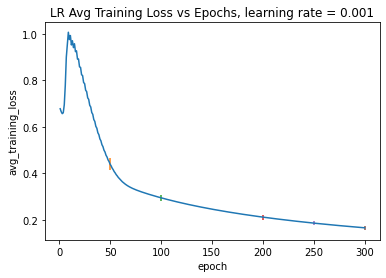

In [18]:
#print(test_accuracies)
# plotting Avg_Training Loss
costs = Avg_Train_loss.tolist()


iters = list(range(1, num_iter+1))
#print(Avg_Train)
plt.plot(iters,costs,  label = "avg_training_loss")
plt.xlabel('epoch')
plt.ylabel('avg_training_loss')
plt.title('LR Avg Training Loss vs Epochs, learning rate = 0.001') 

b = [49,99,199,249,299]

for i in b:
    plt.errorbar(iters[i],costs[i],
            yerr = Std_Dev_Train[i],
            fmt='--')


plt.show() 

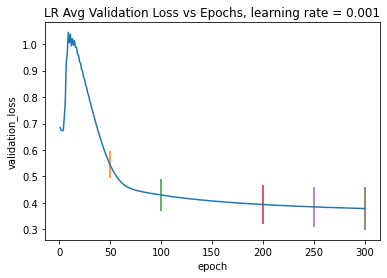

In [19]:
# plotting Avg_Val_Loss
#costs = Avg_Train_loss.tolist()

val_costs = Avg_Val_loss.tolist()

iters = list(range(1, num_iter+1))

plt1 = plt.plot(iters,val_costs,  label = "avg_validation_loss")
plt.xlabel('epoch')
plt.ylabel('validation_loss')
plt.title('LR Avg Validation Loss vs Epochs, learning rate = 0.001')
b = [49,99,199,249,299]
for i in b:
    plt.errorbar(iters[i],val_costs[i],
            yerr = Std_Dev_Val[i])
plt.show() 



In [20]:
# Adding PCA Components np(no. of components) = 7,10,20  and lr = 2.4 , lr = 3.2
# lr has changed as data values have changed after PCA

#Spliting k_folds into train and test arrays

#print(kfoldsX)

# Training Procedure
num_iter = 300
total_test_accuracy  = 0
test_accuracies = np.zeros((10,1))
val_losses = np.zeros((10,1))
val_cost_list = list()
train_cost_list = list()
test_pred_list = list()
test_fold_list = list()

for fold in range(k):
    
    #Splitting into train,val and test set
    
    val_X = k_foldsX[fold%10] 
    val_Y = k_foldsY[fold%10]
    
    test_X = k_foldsX[(fold+1)%k]
    test_Y = k_foldsY[(fold+1)%k]
    
    i1 = (fold+2)%k
    i2 = (fold+9)%k
    if i1<=i2:
        
        train_X = k_foldsX[i2]
        train_Y = k_foldsY[i2]
        for j in range(i1,i2):
            train_X = np.concatenate((train_X,k_foldsX[j]), axis=0)
            train_Y = np.concatenate((train_Y,k_foldsY[j]), axis=0)
            
              
    else :            
        if i1<i2:
            i3 = i1
            i4 = i2
        else :
            i3 = i2
            i4 = i1
        train_X = k_foldsX[i3]
        train_Y = k_foldsY[i3]
        print(i3)
        print(i4)
        for j in range(0,i3):
            #print(j)
            train_X = np.concatenate((train_X,k_foldsX[j]), axis=0)
            train_Y = np.concatenate((train_Y,k_foldsY[j]), axis=0)    
        #print(np.shape(train_X)[0])
        
        train_X1 = k_foldsX[9]
        train_Y1 = k_foldsY[9]
        for j in range(i4,9):
            #print(j)
            train_X1 = np.concatenate((train_X1,k_foldsX[j]), axis=0)
            train_Y1 = np.concatenate((train_Y1,k_foldsY[j]), axis=0)   
        
        #print(np.shape(train_X1)[0])
        train_X = np.concatenate((train_X,train_X1), axis=0)
        train_Y = np.concatenate((train_Y,train_Y1), axis=0)
        
    #batch gradient decscent for kth iteration of k-fold cross_validation
    train_X = train_X/255
    val_X = val_X/255
    test_X = test_X/255
   
    #applying PCA on train_X
    [projected, mean_image, top_sqrt_eigen_values, top_eigen_vectors] = pca(train_X,7)
    train_X = projected
    
    # transforming val_X and test_X using eigenvectors from above
    mean_image = np.average(val_X, axis = 0)
    msd = val_X - mean_image # M x d
    projected = np.matmul(msd, top_eigen_vectors)/top_sqrt_eigen_values
    val_X = projected

    mean_image = np.average(test_X, axis = 0)
    msd = test_X - mean_image # M x d
    projected = np.matmul(msd, top_eigen_vectors)/top_sqrt_eigen_values
    test_X = projected

    print(np.shape(train_X))
    print(np.shape(val_X))
    print(np.shape(test_X))
    
    # d is a dictionary
    d = Logistic_Regression_Model(train_X, train_Y, val_X, val_Y,test_X,test_Y, 300, 3.2)
    
    # test accuracy for this particular iteration of k_fold
    kth_test_accuracy = d['test_accuracy']
    test_accuracies[fold,0] = kth_test_accuracy
    total_test_accuracy = total_test_accuracy + kth_test_accuracy
    
    val_cost_list.append(d['val_costs'])
    train_cost_list.append(d['costs'])
    w = d['w']
    
avg_test_accuracy = total_test_accuracy/10

# Converting lists to Arrays

Val_loss_Array = np.zeros((10,num_iter))
Train_loss_Array = np.zeros((10,num_iter))



for i in range(len(val_cost_list)):
    a1 = np.zeros((1,len(val_cost_list[i])))
    a1 = np.array(val_cost_list[i])
    Val_loss_Array[i,:] = a1

for i in range(len(train_cost_list)):
    a1 = np.zeros((1,len(train_cost_list[i])))
    a1 = np.array(train_cost_list[i])
    Train_loss_Array[i,:] = a1
    
Avg_Val_loss = np.mean(Val_loss_Array,axis = 0)
Avg_Train_loss = np.mean(Train_loss_Array,axis = 0)

Std_Dev_Val = np.std(Val_loss_Array,axis = 0)
Std_Dev_Train = np.std(Train_loss_Array,axis = 0)

# Saving 10 fold test accuracies as csv file
print(test_accuracies)
print(avg_test_accuracy)
test_accuracies1 = np.zeros((11,1))
test_accuracies1[0:10,:] = test_accuracies
test_accuracies1[10,:] = avg_test_accuracy
test_accuracies1.tofile('test_acc_lg_pca_7_lr_3.2.csv', sep = ',')



(241, 7)
(28, 7)
(28, 7)
Training Cost after iteration 0: 0.692280
Training Cost after iteration 10: 0.683999
Training Cost after iteration 20: 0.676251
Training Cost after iteration 30: 0.668998
Training Cost after iteration 40: 0.662209
Training Cost after iteration 50: 0.655851
Training Cost after iteration 60: 0.649893
Training Cost after iteration 70: 0.644307
Training Cost after iteration 80: 0.639068
Training Cost after iteration 90: 0.634151
Training Cost after iteration 100: 0.629533
Training Cost after iteration 110: 0.625192
Training Cost after iteration 120: 0.621110
Training Cost after iteration 130: 0.617268
Training Cost after iteration 140: 0.613650
Training Cost after iteration 150: 0.610239
Training Cost after iteration 160: 0.607022
Training Cost after iteration 170: 0.603986
Training Cost after iteration 180: 0.601118
Training Cost after iteration 190: 0.598407
Training Cost after iteration 200: 0.595843
Training Cost after iteration 210: 0.593416
Training Cost afte

(241, 7)
(28, 7)
(28, 7)
Training Cost after iteration 0: 0.692387
Training Cost after iteration 10: 0.685139
Training Cost after iteration 20: 0.678357
Training Cost after iteration 30: 0.672011
Training Cost after iteration 40: 0.666070
Training Cost after iteration 50: 0.660507
Training Cost after iteration 60: 0.655297
Training Cost after iteration 70: 0.650415
Training Cost after iteration 80: 0.645838
Training Cost after iteration 90: 0.641546
Training Cost after iteration 100: 0.637518
Training Cost after iteration 110: 0.633737
Training Cost after iteration 120: 0.630185
Training Cost after iteration 130: 0.626846
Training Cost after iteration 140: 0.623707
Training Cost after iteration 150: 0.620753
Training Cost after iteration 160: 0.617972
Training Cost after iteration 170: 0.615352
Training Cost after iteration 180: 0.612882
Training Cost after iteration 190: 0.610553
Training Cost after iteration 200: 0.608355
Training Cost after iteration 210: 0.606279
Training Cost afte

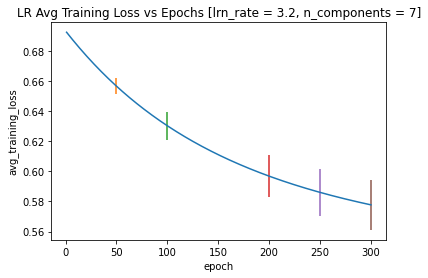

In [21]:
#print(test_pred_list[0])
#print(w)
# plotting Avg_Training Loss
costs = Avg_Train_loss.tolist()


iters = list(range(1, num_iter+1))
#print(Avg_Train)
plt.plot(iters,costs,  label = "avg_training_loss")
plt.xlabel('epoch')
plt.ylabel('avg_training_loss')
plt.title('LR Avg Training Loss vs Epochs [lrn_rate = 3.2, n_components = 7]') 

b = [49,99,199,249,299]

for i in b:
    plt.errorbar(iters[i],costs[i],
            yerr = Std_Dev_Train[i],
            fmt='--')


plt.show() 

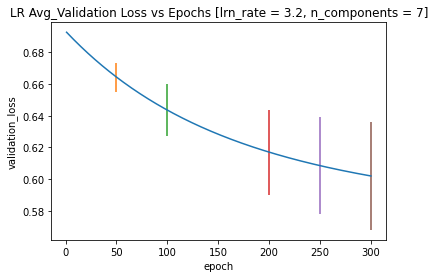

In [22]:
# plotting Avg_Val_Loss
#costs = Avg_Train_loss.tolist()

val_costs = Avg_Val_loss.tolist()

iters = list(range(1, num_iter+1))

plt1 = plt.plot(iters,val_costs,  label = "avg_validation_loss")
plt.xlabel('epoch')
plt.ylabel('validation_loss')
plt.title('LR Avg_Validation Loss vs Epochs [lrn_rate = 3.2, n_components = 7]')
b = [49,99,199,249,299]
for i in b:
    plt.errorbar(iters[i],val_costs[i],
            yerr = Std_Dev_Val[i])
plt.show() 


[1.]
(28, 60000)


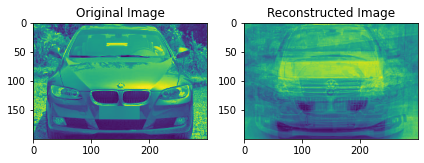

[1.]


In [23]:
# Visualizing principal components
# let X be k_foldsX[0] and take first example image from X and diaplay the principal components

# PLOTTED IMAGE BELONGS TO CLASS 1 i.e minivan

X1 = k_foldsX[0]
print(k_foldsY[0][0])
#print(np.shape(X1))
mean_image = np.average(X1, axis = 0)

[projected, mean_image, top_sqrt_eigen_values, top_eigen_vectors] = pca(X1,4)
X_reduced = projected
#print(np.shape(X_reduced))

#Reconstructing using top 4 eigenvalues
X_rec = np.matmul(X_reduced[:,0:4]*top_sqrt_eigen_values[0:4],top_eigen_vectors[:,0:4].T) + mean_image

print(np.shape(X_rec))
X1 = X1[0].reshape((200,300))
X_rec = X_rec[0].reshape((200,300))
#
# creating image object of above array

fig=plt.figure()
imgs = []
imgs.append(X1)
imgs.append(X_rec)
rows = 1
cols = 2
axes=[]
title = []
title.append('Original Image')
title.append('Reconstructed Image')
for a in range(rows*cols):
    b = imgs[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(title[a])
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()
print(k_foldsY[0][0])
# PLOTTED IMAGE BELONGS TO CLASS 2 AS kfoldsY[0][2] = [0,1,0,0] 

[0.32230285 0.26091614 0.22157358 0.19520743]
[36462.5172165  29517.76318633 25066.89206764 22084.05691966]


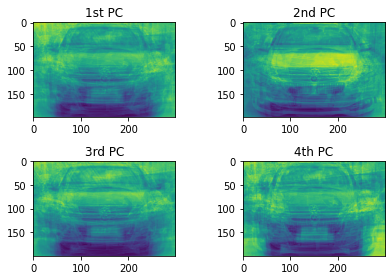

[1.]


In [24]:
# Showing each principal component individually
X_recs = []
imgs = []
X1 = k_foldsX[0]
#print(np.shape(X1))
mean_image = np.average(X1, axis = 0)

[projected, mean_image, top_sqrt_eigen_values, top_eigen_vectors] = pca(X1,4)
X_reduced = projected

print(top_sqrt_eigen_values[0:4]/np.sum(top_sqrt_eigen_values))
print(top_sqrt_eigen_values[0:4])
for i in range(4):
    #Reconstructing using top ith eigenvalue
    Xr1 = np.zeros((28,1))
    Xe1 = np.zeros((1,60000))
    Xr1[:,0] = X_reduced[:,i]*top_sqrt_eigen_values[i]
    Xe1[0,:] = top_eigen_vectors[:,i].T
    
    X_reconstruct = np.matmul(Xr1,Xe1) + mean_image
    X_recs.append(X_reconstruct)
    
    X_recs[i] = X_recs[i][0].reshape((200,300))
    
    


fig=plt.figure()
imgs = X_recs

rows = 2
cols = 2
axes=[]
title = []
title.append('1st PC')
title.append('2nd PC')
title.append('3rd PC')
title.append('4th PC')

for a in range(rows*cols):
    b = imgs[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(title[a])
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()

print(k_foldsY[0][0])
    

In [25]:
# Plotting training loss for  lr1 = 0.0006, lr2 = 0.00001 and lr = 0.001 weights simultaneously

#Spliting k_folds into train and test arrays
training_losses = []
holdout_losses  = []
std_training_losses = []
std_holdout_losses  = []
for lr in [0.0006,0.00001,0.001]:
    # Training Procedure
    num_iter = 300
    total_test_accuracy  = 0
    test_accuracies = np.zeros((10,1))
    val_losses = np.zeros((10,1))
    val_cost_list = list()
    train_cost_list = list()
    test_acc_best = 0 
    

    for fold in range(k):
    
        #Splitting into train,val and test set
    
        val_X = k_foldsX[fold%10] 
        val_Y = k_foldsY[fold%10]
    
        test_X = k_foldsX[(fold+1)%k]
        test_Y = k_foldsY[(fold+1)%k]
    
        i1 = (fold+2)%k
        i2 = (fold+9)%k
        if i1<=i2:
        
            train_X = k_foldsX[i2]
            train_Y = k_foldsY[i2]
            for j in range(i1,i2):
                train_X = np.concatenate((train_X,k_foldsX[j]), axis=0)
                train_Y = np.concatenate((train_Y,k_foldsY[j]), axis=0)
            
              
        else :            
            if i1<i2:
                i3 = i1
                i4 = i2
            else :
                i3 = i2
                i4 = i1
            train_X = k_foldsX[i3]
            train_Y = k_foldsY[i3]
            print(i3)
            print(i4)
            for j in range(0,i3):
                #print(j)
                train_X = np.concatenate((train_X,k_foldsX[j]), axis=0)
                train_Y = np.concatenate((train_Y,k_foldsY[j]), axis=0)    
            #print(np.shape(train_X)[0])
        
            train_X1 = k_foldsX[9]
            train_Y1 = k_foldsY[9]
            for j in range(i4,9):
                #print(j)
                train_X1 = np.concatenate((train_X1,k_foldsX[j]), axis=0)
                train_Y1 = np.concatenate((train_Y1,k_foldsY[j]), axis=0)   
        
            #print(np.shape(train_X1)[0])
            train_X = np.concatenate((train_X,train_X1), axis=0)
            train_Y = np.concatenate((train_Y,train_Y1), axis=0)
        
        #batch gradient decscent for kth iteration of k-fold cross_validation
        train_X = train_X/255
        val_X = val_X/255
        test_X = test_X/255
   
    
        # d is a dictionary
        d = Logistic_Regression_Model(train_X, train_Y, val_X, val_Y,test_X,test_Y, 300, lr)
        # test accuracy for this particular iteration of k_fold
        kth_test_accuracy = d['test_accuracy']
        
    
        test_accuracies[fold,0] = kth_test_accuracy
        total_test_accuracy = total_test_accuracy + kth_test_accuracy
    
        val_cost_list.append(d['val_costs'])
        train_cost_list.append(d['costs'])
          
    
    avg_test_accuracy = total_test_accuracy/10
    # Converting lists to Arrays

    Val_loss_Array = np.zeros((10,num_iter))
    Train_loss_Array = np.zeros((10,num_iter))



    for i in range(len(val_cost_list)):
        a1 = np.zeros((1,len(val_cost_list[i])))
        a1 = np.array(val_cost_list[i])
        Val_loss_Array[i,:] = a1

    for i in range(len(train_cost_list)):
        a1 = np.zeros((1,len(train_cost_list[i])))
        a1 = np.array(train_cost_list[i])
        Train_loss_Array[i,:] = a1
    
    Avg_Val_loss = np.mean(Val_loss_Array,axis = 0)
    Avg_Train_loss = np.mean(Train_loss_Array,axis = 0)

    Std_Dev_Val = np.std(Val_loss_Array,axis = 0)
    Std_Dev_Train = np.std(Train_loss_Array,axis = 0)
    training_losses.append(Avg_Train_loss) 
    holdout_losses.append(Avg_Val_loss)
    std_training_losses.append(Std_Dev_Train) 
    std_holdout_losses.append(Std_Dev_Val)

    print(test_accuracies)






Training Cost after iteration 0: 0.684047
Training Cost after iteration 10: 0.610502
Training Cost after iteration 20: 0.558557
Training Cost after iteration 30: 0.519445
Training Cost after iteration 40: 0.488449
Training Cost after iteration 50: 0.462916
Training Cost after iteration 60: 0.441268
Training Cost after iteration 70: 0.422509
Training Cost after iteration 80: 0.405980
Training Cost after iteration 90: 0.391222
Training Cost after iteration 100: 0.377906
Training Cost after iteration 110: 0.365786
Training Cost after iteration 120: 0.354674
Training Cost after iteration 130: 0.344424
Training Cost after iteration 140: 0.334918
Training Cost after iteration 150: 0.326062
Training Cost after iteration 160: 0.317777
Training Cost after iteration 170: 0.310000
Training Cost after iteration 180: 0.302675
Training Cost after iteration 190: 0.295757
Training Cost after iteration 200: 0.289207
Training Cost after iteration 210: 0.282989
Training Cost after iteration 220: 0.277075

Training Cost after iteration 10: 0.608269
Training Cost after iteration 20: 0.555915
Training Cost after iteration 30: 0.516690
Training Cost after iteration 40: 0.485669
Training Cost after iteration 50: 0.460146
Training Cost after iteration 60: 0.438522
Training Cost after iteration 70: 0.419791
Training Cost after iteration 80: 0.403286
Training Cost after iteration 90: 0.388544
Training Cost after iteration 100: 0.375234
Training Cost after iteration 110: 0.363110
Training Cost after iteration 120: 0.351985
Training Cost after iteration 130: 0.341713
Training Cost after iteration 140: 0.332178
Training Cost after iteration 150: 0.323287
Training Cost after iteration 160: 0.314964
Training Cost after iteration 170: 0.307144
Training Cost after iteration 180: 0.299776
Training Cost after iteration 190: 0.292814
Training Cost after iteration 200: 0.286219
Training Cost after iteration 210: 0.279958
Training Cost after iteration 220: 0.274002
Training Cost after iteration 230: 0.2683

0.7800829875518672
0.8214285714285714
0.7142857142857143
1
4
Training Cost after iteration 0: 0.692964
Training Cost after iteration 10: 0.691174
Training Cost after iteration 20: 0.689440
Training Cost after iteration 30: 0.687745
Training Cost after iteration 40: 0.686076
Training Cost after iteration 50: 0.684428
Training Cost after iteration 60: 0.682798
Training Cost after iteration 70: 0.681182
Training Cost after iteration 80: 0.679579
Training Cost after iteration 90: 0.677990
Training Cost after iteration 100: 0.676413
Training Cost after iteration 110: 0.674848
Training Cost after iteration 120: 0.673295
Training Cost after iteration 130: 0.671753
Training Cost after iteration 140: 0.670223
Training Cost after iteration 150: 0.668704
Training Cost after iteration 160: 0.667197
Training Cost after iteration 170: 0.665701
Training Cost after iteration 180: 0.664215
Training Cost after iteration 190: 0.662740
Training Cost after iteration 200: 0.661277
Training Cost after iterat

Training Cost after iteration 0: 0.692959
Training Cost after iteration 10: 0.691157
Training Cost after iteration 20: 0.689457
Training Cost after iteration 30: 0.687818
Training Cost after iteration 40: 0.686219
Training Cost after iteration 50: 0.684645
Training Cost after iteration 60: 0.683092
Training Cost after iteration 70: 0.681553
Training Cost after iteration 80: 0.680028
Training Cost after iteration 90: 0.678515
Training Cost after iteration 100: 0.677013
Training Cost after iteration 110: 0.675521
Training Cost after iteration 120: 0.674039
Training Cost after iteration 130: 0.672568
Training Cost after iteration 140: 0.671106
Training Cost after iteration 150: 0.669654
Training Cost after iteration 160: 0.668211
Training Cost after iteration 170: 0.666778
Training Cost after iteration 180: 0.665354
Training Cost after iteration 190: 0.663940
Training Cost after iteration 200: 0.662534
Training Cost after iteration 210: 0.661138
Training Cost after iteration 220: 0.659750

Training Cost after iteration 290: 0.173430
0.9875518672199171
0.75
0.8928571428571429
3
6
Training Cost after iteration 0: 0.678846
Training Cost after iteration 10: 0.599693
Training Cost after iteration 20: 0.854582
Training Cost after iteration 30: 0.695383
Training Cost after iteration 40: 0.555109
Training Cost after iteration 50: 0.449692
Training Cost after iteration 60: 0.384941
Training Cost after iteration 70: 0.353381
Training Cost after iteration 80: 0.336120
Training Cost after iteration 90: 0.322138
Training Cost after iteration 100: 0.309515
Training Cost after iteration 110: 0.297976
Training Cost after iteration 120: 0.287364
Training Cost after iteration 130: 0.277555
Training Cost after iteration 140: 0.268449
Training Cost after iteration 150: 0.259962
Training Cost after iteration 160: 0.252026
Training Cost after iteration 170: 0.244584
Training Cost after iteration 180: 0.237585
Training Cost after iteration 190: 0.230987
Training Cost after iteration 200: 0.224

Training Cost after iteration 290: 0.158139
0.9866071428571429
0.7111111111111111
0.75
[[0.92857143]
 [0.85714286]
 [0.75      ]
 [0.89285714]
 [0.89285714]
 [0.85714286]
 [0.89285714]
 [0.75      ]
 [0.73333333]
 [0.75      ]]


(300,)


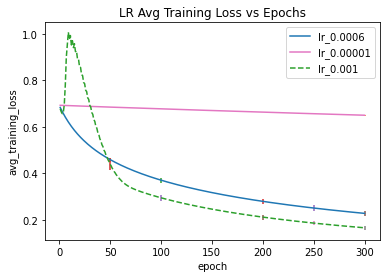

In [26]:

# plotting Avg_Training Loss for lr1 = 0.0006, lr2 = 0.00001 and lr = 0.001 weights simultaneously 

costs = []
print(np.shape(std_training_losses[0]))

iters = list(range(1, 301))
#print(Avg_Train)
plt.plot(iters,training_losses[0].tolist(),label = "lr_0.0006")
#plt.xlabel('epoch')
#plt.ylabel('avg_training_loss')
 

b = [49,99,199,249,299]

for i in b:
    plt.errorbar(iters[i],training_losses[0].tolist()[i],
            yerr = std_training_losses[0].tolist()[i],
            fmt='--')
#plt.legend()
#plt.title('LR Avg Training Loss vs Epochs')
#plt.show()    
plt.plot(iters,training_losses[1].tolist(),label = "lr_0.00001")
plt.xlabel('epoch')
plt.ylabel('avg_training_loss')
 

b = [49,99,199,249,299]

for i in b:
    plt.errorbar(iters[i],training_losses[1].tolist()[i],
            yerr = std_training_losses[1].tolist()[i],
            fmt='--')    

#plt.legend()
#plt.title('LR Avg Training Loss vs Epochs')
#plt.show() 

plt.plot(iters,training_losses[2].tolist(),label = 'lr_0.001')
plt.xlabel('epoch')
plt.ylabel('avg_training_loss')
 

b = [49,99,199,249,299]

for i in b:
    plt.errorbar(iters[i],training_losses[2].tolist()[i],
            yerr = std_training_losses[2].tolist()[i],
            fmt='--')  
    
plt.xlabel('epoch')
plt.ylabel('avg_training_loss')  
plt.legend()
plt.title('LR Avg Training Loss vs Epochs')
plt.show() 

In [27]:
## Q5 part d
## Sedan vs Pickup data
## Setting up data
# Evaluating Softmax_Regression Model on Aligned dataset

#[d1, d2] = load_data(data_dir="./aligned/")

# Loading the dataset

dt_p = d1['Pickup']
dt_s = d1['Sedan']

# Dividing data into k=10 sets with each set containing roughly equal number of examples from each class

dataset = list()
dataset.append(dt_p)
dataset.append(dt_s)
#dataset.append(dt_p)
#dataset.append(dt_s)

# Flattening all the images

f_data = flatten_dataset(dataset)

        
k = 10
k_folds = cross_val_all_classes(k,f_data) 

# each k-fold[i] is a list containing some number of 1-d arrays
# converting list of k-folds into k 2-d arrays

new_kfolds = kfolds_to_karrays(k_folds)

#convert each k set into X and one-hot Y

[k_foldsX,k_foldsY] = split_data_into_X_Y(new_kfolds)    


In [28]:
## Q5 part d
## Sedan vs Pickup data
# Adding PCA Components np(no. of components) = 20  and lr = 2.4 (values taken from training based on part c)

#Spliting k_folds into train and test arrays

#print(kfoldsX)

# Training Procedure
num_iter = 300
total_test_accuracy  = 0
test_accuracies = np.zeros((10,1))
val_losses = np.zeros((10,1))
val_cost_list = list()
train_cost_list = list()
test_pred_list = list()
test_fold_list = list()

for fold in range(k):
    
    #Splitting into train,val and test set
    
    val_X = k_foldsX[fold%10] 
    val_Y = k_foldsY[fold%10]
    
    test_X = k_foldsX[(fold+1)%k]
    test_Y = k_foldsY[(fold+1)%k]
    
    i1 = (fold+2)%k
    i2 = (fold+9)%k
    if i1<=i2:
        
        train_X = k_foldsX[i2]
        train_Y = k_foldsY[i2]
        for j in range(i1,i2):
            train_X = np.concatenate((train_X,k_foldsX[j]), axis=0)
            train_Y = np.concatenate((train_Y,k_foldsY[j]), axis=0)
            
              
    else :            
        if i1<i2:
            i3 = i1
            i4 = i2
        else :
            i3 = i2
            i4 = i1
        train_X = k_foldsX[i3]
        train_Y = k_foldsY[i3]
        print(i3)
        print(i4)
        for j in range(0,i3):
            #print(j)
            train_X = np.concatenate((train_X,k_foldsX[j]), axis=0)
            train_Y = np.concatenate((train_Y,k_foldsY[j]), axis=0)    
        #print(np.shape(train_X)[0])
        
        train_X1 = k_foldsX[9]
        train_Y1 = k_foldsY[9]
        for j in range(i4,9):
            #print(j)
            train_X1 = np.concatenate((train_X1,k_foldsX[j]), axis=0)
            train_Y1 = np.concatenate((train_Y1,k_foldsY[j]), axis=0)   
        
        #print(np.shape(train_X1)[0])
        train_X = np.concatenate((train_X,train_X1), axis=0)
        train_Y = np.concatenate((train_Y,train_Y1), axis=0)
        
    #batch gradient decscent for kth iteration of k-fold cross_validation
    train_X = train_X/255
    val_X = val_X/255
    test_X = test_X/255
   
    #applying PCA on train_X
    [projected, mean_image, top_sqrt_eigen_values, top_eigen_vectors] = pca(train_X,20)
    train_X = projected
    
    # transforming val_X and test_X using eigenvectors from above
    mean_image = np.average(val_X, axis = 0)
    msd = val_X - mean_image # M x d
    projected = np.matmul(msd, top_eigen_vectors)/top_sqrt_eigen_values
    val_X = projected

    mean_image = np.average(test_X, axis = 0)
    msd = test_X - mean_image # M x d
    projected = np.matmul(msd, top_eigen_vectors)/top_sqrt_eigen_values
    test_X = projected

    print(np.shape(train_X))
    print(np.shape(val_X))
    print(np.shape(test_X))
    
    # d is a dictionary
    d = Logistic_Regression_Model(train_X, train_Y, val_X, val_Y,test_X,test_Y, 300, 2.4)
    
    # test accuracy for this particular iteration of k_fold
    kth_test_accuracy = d['test_accuracy']
    test_accuracies[fold,0] = kth_test_accuracy
    total_test_accuracy = total_test_accuracy + kth_test_accuracy
    
    val_cost_list.append(d['val_costs'])
    train_cost_list.append(d['costs'])
    w = d['w']
    
avg_test_accuracy = total_test_accuracy/10

# Converting lists to Arrays

Val_loss_Array = np.zeros((10,num_iter))
Train_loss_Array = np.zeros((10,num_iter))



for i in range(len(val_cost_list)):
    a1 = np.zeros((1,len(val_cost_list[i])))
    a1 = np.array(val_cost_list[i])
    Val_loss_Array[i,:] = a1

for i in range(len(train_cost_list)):
    a1 = np.zeros((1,len(train_cost_list[i])))
    a1 = np.array(train_cost_list[i])
    Train_loss_Array[i,:] = a1
    
Avg_Val_loss = np.mean(Val_loss_Array,axis = 0)
Avg_Train_loss = np.mean(Train_loss_Array,axis = 0)

Std_Dev_Val = np.std(Val_loss_Array,axis = 0)
Std_Dev_Train = np.std(Train_loss_Array,axis = 0)

# Saving 10 fold test accuracies as csv file
print(test_accuracies)
print(avg_test_accuracy)
test_accuracies1 = np.zeros((11,1))
test_accuracies1[0:10,:] = test_accuracies
test_accuracies1[10,:] = avg_test_accuracy
test_accuracies1.tofile('test_acc_part5d_pca20_lr_2.4.csv', sep = ',')



(240, 20)
(30, 20)
(30, 20)
Training Cost after iteration 0: 0.691878
Training Cost after iteration 10: 0.679527
Training Cost after iteration 20: 0.667780
Training Cost after iteration 30: 0.656604
Training Cost after iteration 40: 0.645971
Training Cost after iteration 50: 0.635851
Training Cost after iteration 60: 0.626218
Training Cost after iteration 70: 0.617046
Training Cost after iteration 80: 0.608309
Training Cost after iteration 90: 0.599984
Training Cost after iteration 100: 0.592048
Training Cost after iteration 110: 0.584479
Training Cost after iteration 120: 0.577258
Training Cost after iteration 130: 0.570365
Training Cost after iteration 140: 0.563782
Training Cost after iteration 150: 0.557492
Training Cost after iteration 160: 0.551479
Training Cost after iteration 170: 0.545728
Training Cost after iteration 180: 0.540225
Training Cost after iteration 190: 0.534956
Training Cost after iteration 200: 0.529908
Training Cost after iteration 210: 0.525070
Training Cost a

(240, 20)
(30, 20)
(30, 20)
Training Cost after iteration 0: 0.691743
Training Cost after iteration 10: 0.678086
Training Cost after iteration 20: 0.665095
Training Cost after iteration 30: 0.652737
Training Cost after iteration 40: 0.640978
Training Cost after iteration 50: 0.629787
Training Cost after iteration 60: 0.619134
Training Cost after iteration 70: 0.608989
Training Cost after iteration 80: 0.599324
Training Cost after iteration 90: 0.590114
Training Cost after iteration 100: 0.581333
Training Cost after iteration 110: 0.572958
Training Cost after iteration 120: 0.564965
Training Cost after iteration 130: 0.557334
Training Cost after iteration 140: 0.550044
Training Cost after iteration 150: 0.543077
Training Cost after iteration 160: 0.536415
Training Cost after iteration 170: 0.530041
Training Cost after iteration 180: 0.523940
Training Cost after iteration 190: 0.518096
Training Cost after iteration 200: 0.512496
Training Cost after iteration 210: 0.507127
Training Cost a

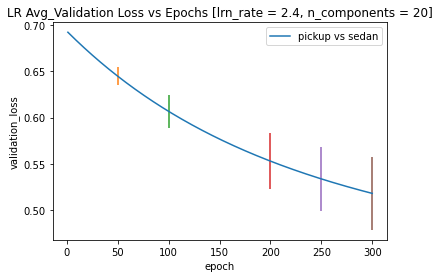

In [29]:
# plotting Avg_Val_Loss
#costs = Avg_Train_loss.tolist()

val_costs = Avg_Val_loss.tolist()

iters = list(range(1, num_iter+1))

plt1 = plt.plot(iters,val_costs,  label = "pickup vs sedan")
plt.xlabel('epoch')
plt.ylabel('validation_loss')
plt.title('LR Avg_Validation Loss vs Epochs [lrn_rate = 2.4, n_components = 20]')
b = [49,99,199,249,299]
for i in b:
    plt.errorbar(iters[i],val_costs[i],
            yerr = Std_Dev_Val[i])
plt.legend()    
plt.show() 


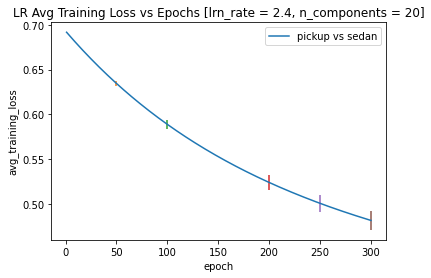

In [30]:
#print(test_pred_list[0])
#print(w)
# plotting Avg_Training Loss
costs = Avg_Train_loss.tolist()


iters = list(range(1, num_iter+1))
#print(Avg_Train)
plt.plot(iters,costs,  label = "pickup vs sedan")
plt.xlabel('epoch')
plt.ylabel('avg_training_loss')
plt.title('LR Avg Training Loss vs Epochs [lrn_rate = 2.4, n_components = 20]') 
plt.legend()
b = [49,99,199,249,299]

for i in b:
    plt.errorbar(iters[i],costs[i],
            yerr = Std_Dev_Train[i],
            fmt='--')


plt.show() 